In [3]:
import torch
import numpy as np
import torch.nn.functional as F


In [4]:
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [5]:

# Create a tensor of size 3x3 with random values
tensor = torch.randn(3, 3)
print(tensor)

tensor([[ 0.7204, -0.9337,  0.8117],
        [ 0.3155, -0.8590, -0.0803],
        [-1.3347,  1.0322,  0.0632]])


In [6]:
import torch

# Create a PyTorch tensor
tensor = torch.tensor([1, 2, 3, 4, 5])

# Convert the tensor to a Python list
tensor_list = tensor.tolist()

print(tensor_list)
print(tensor)

[1, 2, 3, 4, 5]
tensor([1, 2, 3, 4, 5])


In [7]:
mytorch1 =  torch.arange(0, 10)
mytorch1

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
mytorch1.view(2,5)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [9]:
mytorch1.reshape(2,5)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [10]:
mytorch2 = torch.arange(10)
mytorch2 = mytorch2.reshape(2,5)

In [11]:
mytorch2.reshape(-1,5)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [12]:
mytorch3 = torch.arange(10)
mytorch3 = mytorch3.view(2,5)

In [13]:
mytorch3.contiguous()

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [14]:
mytorch3.T

tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])

In [15]:
rows,column = mytorch3.shape
print(f"Row:{rows}, Column:{column}")

Row:2, Column:5


In [16]:
mytorch3[:,4]

tensor([4, 9])

In [17]:
mytorch4 = torch.arange(0,19,2).reshape(2,5)
mytorch4

tensor([[ 0,  2,  4,  6,  8],
        [10, 12, 14, 16, 18]])

In [18]:
mytorch3+mytorch4

tensor([[ 0,  3,  6,  9, 12],
        [15, 18, 21, 24, 27]])

In [19]:
mytorch4 *mytorch3

tensor([[  0,   2,   8,  18,  32],
        [ 50,  72,  98, 128, 162]])

In [20]:
mytorch3.add(2
)

tensor([[ 2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11]])

In [21]:
torch.div(mytorch3,2)

tensor([[0.0000, 0.5000, 1.0000, 1.5000, 2.0000],
        [2.5000, 3.0000, 3.5000, 4.0000, 4.5000]])

In [22]:
torch.div(mytorch3,mytorch4)

tensor([[   nan, 0.5000, 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000, 0.5000, 0.5000]])

In [23]:
import numpy as np


In [24]:
mytorch5 = mytorch4.numpy
mytorch5

<function Tensor.numpy>

In [25]:
mytorch6 = mytorch4%3

In [26]:
mytorch6[1,1]

tensor(0)

In [27]:
torch.pow(mytorch6,2)

tensor([[0, 4, 1, 0, 4],
        [1, 0, 4, 1, 0]])

In [28]:
class Model(nn.Module):
    # Input layer: 4 feature of the flower 
    # -> hidden layer H1 (unknown neurons) -> 
    # Hidden layer 2 (unknown neurons) -> 
    # output layer: 3 classes
    def __init__(self,in_features = 4, h1 = 8, h2=9, out_features = 3) :
        super().__init__() # Instantinate the our nn.Module
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [29]:
# Random seed for reproducibility
torch.manual_seed(41)
model = Model()

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
from sklearn.datasets import load_iris

iris = load_iris()
# Load the Irish dataset



In [32]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [33]:
import pandas as pd

my_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [34]:
my_df.shape

(150, 4)

In [35]:
my_df.columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

In [36]:
X = my_df.values


In [37]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [38]:
len(iris.target)

150

In [39]:
y = iris.target

In [40]:
from sklearn.model_selection import train_test_split


# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)
# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: torch.Size([120, 4])
X_test shape: torch.Size([30, 4])
y_train shape: torch.Size([120])
y_test shape: torch.Size([30])


In [41]:
# Set the criterion of model to measure the error, how far off the predictions are from the target
criterion = nn.CrossEntropyLoss()
# Set the optimizer to update the weights based on the loss, using the Adam optimizer
# lr is the learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [42]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [123]:
# Train our model
# Epoch ( one run thru all training data)
epochs = 4000
losses = []
for i in range(epochs):
    # Forward pass
    y_pred = model.forward(X_train)
    # Compute the loss
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss.item()}')
    # Do some backward propagation: take the errror rate of forward propagation
    # and feed it back thru the netwrork to adjust the weights (fine -tuning)
    # Zero the gradients
    optimizer.zero_grad()
    # Backward pass
    loss.backward()
    # Update the weights
    optimizer.step()

Epoch: 0 Loss: 0.0466003380715847
Epoch: 10 Loss: 0.04660780727863312
Epoch: 20 Loss: 0.046605184674263
Epoch: 30 Loss: 0.04659340903162956
Epoch: 40 Loss: 0.04658515751361847
Epoch: 50 Loss: 0.04658135026693344
Epoch: 60 Loss: 0.046579889953136444
Epoch: 70 Loss: 0.04657941684126854
Epoch: 80 Loss: 0.046579379588365555
Epoch: 90 Loss: 0.04657937213778496
Epoch: 100 Loss: 0.04657928645610809
Epoch: 110 Loss: 0.046579230576753616
Epoch: 120 Loss: 0.04657919704914093
Epoch: 130 Loss: 0.046579163521528244
Epoch: 140 Loss: 0.04657914862036705
Epoch: 150 Loss: 0.04657909646630287
Epoch: 160 Loss: 0.04657907411456108
Epoch: 170 Loss: 0.04657907783985138
Epoch: 180 Loss: 0.0465790256857872
Epoch: 190 Loss: 0.04657900705933571
Epoch: 200 Loss: 0.04657900705933571
Epoch: 210 Loss: 0.046578988432884216
Epoch: 220 Loss: 0.04657898098230362
Epoch: 230 Loss: 0.04657893255352974
Epoch: 240 Loss: 0.04657892882823944
Epoch: 250 Loss: 0.04657890275120735
Epoch: 260 Loss: 0.04657886549830437
Epoch: 270 

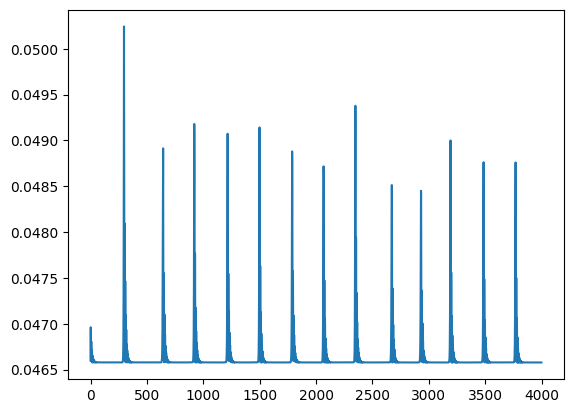

In [124]:
plt.plot(range(epochs), losses)

In [125]:
# Validate the model
# Set the model to evaluation mode
model.eval()
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'Loss: {loss:.8f}')


Loss: 0.01534220


In [126]:
for i, j in enumerate(y_val):
    print(f'Prediction: {torch.argmax(j).item()} True: {y_test[i]}')

Prediction: 1 True: 1
Prediction: 0 True: 0
Prediction: 2 True: 2
Prediction: 1 True: 1
Prediction: 1 True: 1
Prediction: 0 True: 0
Prediction: 1 True: 1
Prediction: 2 True: 2
Prediction: 1 True: 1
Prediction: 1 True: 1
Prediction: 2 True: 2
Prediction: 0 True: 0
Prediction: 0 True: 0
Prediction: 0 True: 0
Prediction: 0 True: 0
Prediction: 1 True: 1
Prediction: 2 True: 2
Prediction: 1 True: 1
Prediction: 1 True: 1
Prediction: 2 True: 2
Prediction: 0 True: 0
Prediction: 2 True: 2
Prediction: 0 True: 0
Prediction: 2 True: 2
Prediction: 2 True: 2
Prediction: 2 True: 2
Prediction: 2 True: 2
Prediction: 2 True: 2
Prediction: 0 True: 0
Prediction: 0 True: 0


In [127]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'Prediction: {torch.argmax(y_val).item()} True: {y_test[i]}')
        if torch.argmax(y_val).item() == y_test[i]:
            correct += 1

Prediction: 1 True: 1
Prediction: 0 True: 0
Prediction: 2 True: 2
Prediction: 1 True: 1
Prediction: 1 True: 1
Prediction: 0 True: 0
Prediction: 1 True: 1
Prediction: 2 True: 2
Prediction: 1 True: 1
Prediction: 1 True: 1
Prediction: 2 True: 2
Prediction: 0 True: 0
Prediction: 0 True: 0
Prediction: 0 True: 0
Prediction: 0 True: 0
Prediction: 1 True: 1
Prediction: 2 True: 2
Prediction: 1 True: 1
Prediction: 1 True: 1
Prediction: 2 True: 2
Prediction: 0 True: 0
Prediction: 2 True: 2
Prediction: 0 True: 0
Prediction: 2 True: 2
Prediction: 2 True: 2
Prediction: 2 True: 2
Prediction: 2 True: 2
Prediction: 2 True: 2
Prediction: 0 True: 0
Prediction: 0 True: 0


In [115]:
correct = 0
for i, data in enumerate(X_test):
    # print("Value of i____________:",i,"value of data______________:",data)
    y_pred = model.forward(data)
    
    # print(y_pred)
    prediction = torch.argmax(y_pred).item()
    if prediction == y_test[i]:
        correct += 1
        print(f"Prediction: {prediction} True: {y_test[i]}")
    # print("Value of y_pred____________:",torch.argmax(y_pred).item(), )
print(f'We got {correct} correct over {len(X_test)}!')

Prediction: 1 True: 1
Prediction: 0 True: 0
Prediction: 2 True: 2
Prediction: 1 True: 1
Prediction: 1 True: 1
Prediction: 0 True: 0
Prediction: 1 True: 1
Prediction: 2 True: 2
Prediction: 1 True: 1
Prediction: 1 True: 1
Prediction: 2 True: 2
Prediction: 0 True: 0
Prediction: 0 True: 0
Prediction: 0 True: 0
Prediction: 0 True: 0
Prediction: 1 True: 1
Prediction: 2 True: 2
Prediction: 1 True: 1
Prediction: 1 True: 1
Prediction: 2 True: 2
Prediction: 0 True: 0
Prediction: 2 True: 2
Prediction: 0 True: 0
Prediction: 2 True: 2
Prediction: 2 True: 2
Prediction: 2 True: 2
Prediction: 2 True: 2
Prediction: 2 True: 2
Prediction: 0 True: 0
Prediction: 0 True: 0
We got 30 correct over 30!


In [116]:
y_test

tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0])

In [117]:
y_pred = torch.tensor([0.6, 0.2, 0.7])
torch.argmin(y_pred).item()

1